In [10]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
#데이터
mpg = pd.read_csv('../files/mpg.csv')                        
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'               
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]

In [8]:
#drv에 이상치가 잇는지 확인

mpg['drv'].value_counts().sort_values()

#k 이상한 값이 있는걸 확인

k      4
r     24
4    100
f    106
Name: drv, dtype: int64

In [11]:
mpg['drv'] = np.where(mpg['drv'].isin(['r','4','f']),mpg['drv'],np.nan)

In [12]:
#이상치 없어진거 확인
mpg['drv'].value_counts().sort_values()

r     24
4    100
f    106
Name: drv, dtype: int64

<Axes: ylabel='cty'>

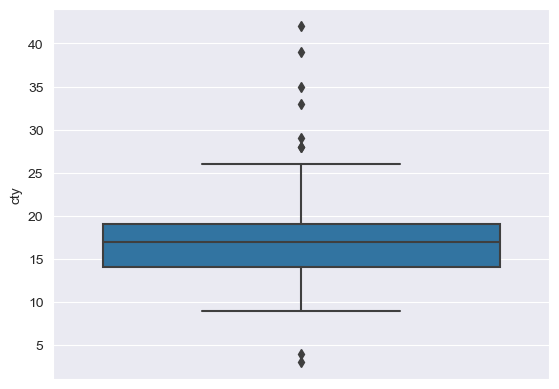

In [14]:
#상자그림에 cty에 이상치 있는지 확인
sns.boxplot(data = mpg, y = 'cty')

In [15]:
#극단치 기준값 구하기
#하위 25퍼
pct25 = mpg['cty'].quantile(.25)
pct25

14.0

In [17]:
#하위 75퍼
pct75 = mpg['cty'].quantile(.75)
pct75

19.0

In [18]:
#iqr - 사분위 범위
iqr = pct75 - pct25
iqr

5.0

In [27]:
#하한 극단치
d = pct25 - 1.5 * iqr
d

6.5

In [29]:
#상한 극단치
u = pct75 + 1.5 * iqr
u

26.5

In [30]:
mpg['cty'] = np.where((mpg['cty'] < d) | (mpg['cty'] > u), np.nan, mpg['cty'])

In [31]:
mpg['cty'].isna().sum()

9

<Axes: ylabel='cty'>

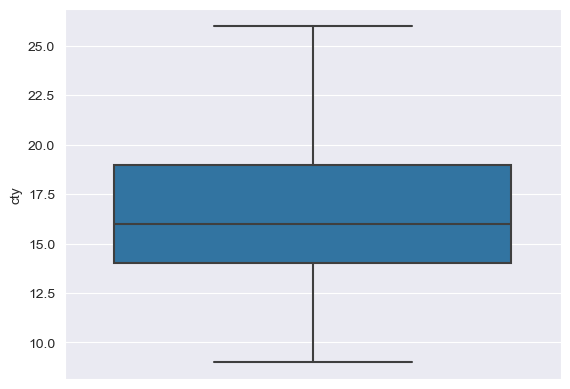

In [34]:
#이상치 제거 후 상자그리기
sns.boxplot(data = mpg, y = 'cty')

In [35]:
#drv별로 cty평균
mpg.dropna(subset=['cty'])\
    .groupby('drv')\
    .agg(mean_cty = ('cty','mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333
